In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np 
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier

In [3]:
#import flights_csv
flights_df = pd.read_csv('Resources/flights_update.csv')
flights_df.head()

,MONTH,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE_Miles,MINUTES_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,1448,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,2330,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,2296,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,2342,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,1448,-21.0


In [5]:
#using minutes_delayed as y value, has to be int
flights_df['MINUTES_DELAY'] = flights_df['MINUTES_DELAY'].values.astype(np.int64)

In [8]:
#drop columns SORRY MU COMPUTER SUCKS, ADD COLUMNS BACK IN 
flights_df = flights_df.drop(['FLIGHT_NUMBER', 'TAIL_NUMBER', 'DISTANCE_Miles', 'DAY_OF_WEEK'], axis=1)
flights_df

,MONTH,DATE,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,MINUTES_DELAY
0,1,1,AS,ANC,SEA,-22
1,1,1,AA,LAX,PBI,-9
2,1,1,US,SFO,CLT,5
3,1,1,AA,LAX,MIA,-9
4,1,1,AS,SEA,ANC,-21
...,...,...,...,...,...,...
1048570,3,10,EV,RDU,EWR,-16
1048571,3,10,UA,LGA,IAH,-2
1048572,3,10,UA,SAN,ORD,3
1048573,3,10,EV,MSY,ORD,-13


In [10]:
#creating new df to remove 
new_flights_df = flights_df.loc[flights_df["MINUTES_DELAY"] >= -100 ]
print(new_flights_df)

         MONTH  DATE AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  MINUTES_DELAY
0            1     1      AS            ANC                 SEA            -22
1            1     1      AA            LAX                 PBI             -9
2            1     1      US            SFO                 CLT              5
3            1     1      AA            LAX                 MIA             -9
4            1     1      AS            SEA                 ANC            -21
...        ...   ...     ...            ...                 ...            ...
1048569      3    10      DL            PHX                 ATL             19
1048570      3    10      EV            RDU                 EWR            -16
1048571      3    10      UA            LGA                 IAH             -2
1048572      3    10      UA            SAN                 ORD              3
1048573      3    10      EV            MSY                 ORD            -13

[1005504 rows x 6 columns]


In [11]:
#corr() is used to find the pairwise correlation of all columns in the dataframe. 
#Any na values are automatically excluded. 
#For any non-numeric data type columns in the dataframe it is ignored.
new_flights_df.corr()

,MONTH,DATE,MINUTES_DELAY
MONTH,1.000000,-0.342767,0.045479
DATE,-0.342767,1.000000,-0.079472
MINUTES_DELAY,0.045479,-0.079472,1.000000


<AxesSubplot:title={'center':'Heat Map'}>

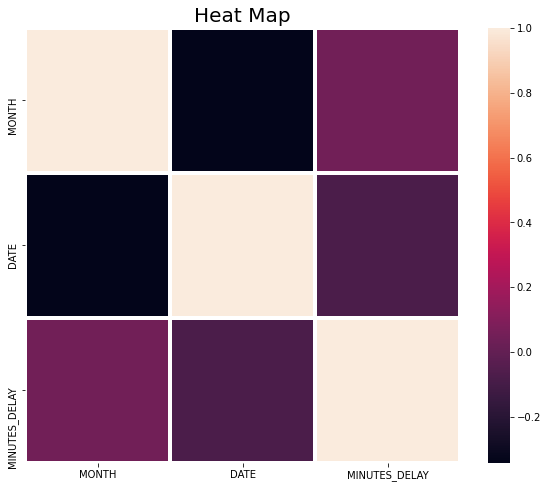

In [12]:
plt.figure(figsize=(10,8))
plt.title('Heat Map', fontsize=20)
sn.heatmap(new_flights_df.corr(), cbar=True, annot =False, square=True, fmt='.2f',annot_kws={'size':15}, linewidth=3)

In [14]:
new_flights_df[new_flights_df.columns[1:]].corr()['MINUTES_DELAY'][:].sort_values()

DATE            -0.079472
MINUTES_DELAY    1.000000
Name: MINUTES_DELAY, dtype: float64

In [15]:
result = []
for ind in new_flights_df.index:
    if new_flights_df['MINUTES_DELAY'][ind]>15:
      result.append(1)
    else:
      result.append(0) 
        
new_flights_df['Result']  = result

/Users/sking/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
new_flights_df['Result'].value_counts()

0    785087
1    220417
Name: Result, dtype: int64

In [19]:
features=['MONTH', 'MONTH', 'MINUTES_DELAY']

X=new_flights_df[features]
y=new_flights_df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [21]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    235731
           1       1.00      1.00      1.00     65921

    accuracy                           1.00    301652
   macro avg       1.00      1.00      1.00    301652
weighted avg       1.00      1.00      1.00    301652



In [27]:
# Initial imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=70, train_size=0.50)

In [47]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(502752, 3)
(502752, 3)
(502752,)
(502752,)


In [48]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

In [50]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)

In [51]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,392794,0
Actual 1,0,109958


In [52]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [53]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,392794,0
Actual 1,0,109958


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    392794
           1       1.00      1.00      1.00    109958

    accuracy                           1.00    502752
   macro avg       1.00      1.00      1.00    502752
weighted avg       1.00      1.00      1.00    502752

